<a href="https://colab.research.google.com/github/Salma1-dev/gomycode_excersises/blob/main/Bank_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
from __future__ import print_function

import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [114]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bank.csv to bank (1).csv
User uploaded file "bank.csv" with length 918960 bytes


In [115]:
import pandas as pd

bank_data = pd.read_csv("bank.csv")

In [116]:
column_names = bank_data.columns
for column in column_names:
    print(column + ' - ' + str(bank_data[column].isnull().sum()))

age - 0
job - 0
marital - 0
education - 0
default - 0
balance - 0
housing - 0
loan - 0
contact - 0
day - 0
month - 0
duration - 0
campaign - 0
pdays - 0
previous - 0
poutcome - 0
deposit - 0


In [117]:
bank_data.corr()



,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


In [118]:
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [119]:
bank_data = bank_data.drop('contact',axis=1)

In [120]:
bank_data = bank_data.drop('poutcome',axis=1)

In [121]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,0,yes


In [122]:
yes_dict = {"yes":1 ,"no":0}
replacement_dict = {"default":yes_dict,
                    "housing":yes_dict,
                    "loan":yes_dict,
                    "deposit":yes_dict}
bank_data.replace(replacement_dict, inplace = True)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,0,2343,1,0,5,may,1042,1,-1,0,1
1,56,admin.,married,secondary,0,45,0,0,5,may,1467,1,-1,0,1
2,41,technician,married,secondary,0,1270,1,0,5,may,1389,1,-1,0,1
3,55,services,married,secondary,0,2476,1,0,5,may,579,1,-1,0,1
4,54,admin.,married,tertiary,0,184,0,0,5,may,673,2,-1,0,1


In [123]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [124]:
bank_data.job = le.fit_transform(bank_data.job)

In [125]:
bank_data.marital = le.fit_transform(bank_data.marital)

In [126]:
bank_data.education = le.fit_transform(bank_data.education)
bank_data.housing = le.fit_transform(bank_data.housing)
bank_data.loan = le.fit_transform(bank_data.loan)
bank_data.month = le.fit_transform(bank_data.month)

In [127]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,0,1,1,0,2343,1,0,5,8,1042,1,-1,0,1
1,56,0,1,1,0,45,0,0,5,8,1467,1,-1,0,1
2,41,9,1,1,0,1270,1,0,5,8,1389,1,-1,0,1
3,55,7,1,1,0,2476,1,0,5,8,579,1,-1,0,1
4,54,0,1,2,0,184,0,0,5,8,673,2,-1,0,1


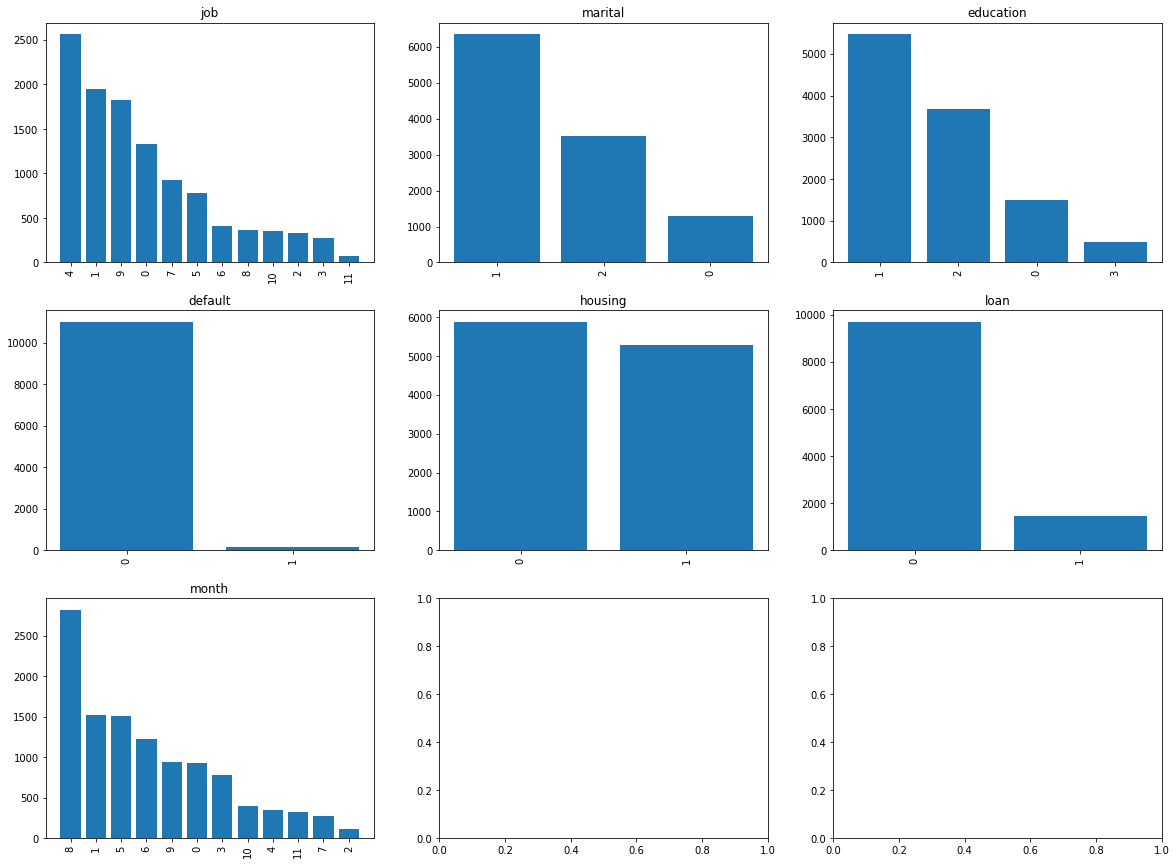

In [128]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = bank_data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

In [129]:
X = bank_data.iloc[:,0:14]
X[0:10]

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,59,0,1,1,0,2343,1,0,5,8,1042,1,-1,0
1,56,0,1,1,0,45,0,0,5,8,1467,1,-1,0
2,41,9,1,1,0,1270,1,0,5,8,1389,1,-1,0
3,55,7,1,1,0,2476,1,0,5,8,579,1,-1,0
4,54,0,1,2,0,184,0,0,5,8,673,2,-1,0
5,42,4,2,2,0,0,1,1,5,8,562,2,-1,0
6,56,4,1,2,0,830,1,1,6,8,1201,1,-1,0
7,60,5,0,1,0,545,1,0,6,8,1030,1,-1,0
8,37,9,1,1,0,1,1,0,6,8,608,1,-1,0
9,28,7,2,1,0,5090,1,0,6,8,1297,3,-1,0


In [156]:
Y = bank_data.iloc[:,14]
Y[1]

1

In [157]:
X_initial_train, X_test, y_initial_train,y_test = train_test_split(X, Y, test_size = 0.2)
X_train, X_val,y_train, y_val = train_test_split(X_initial_train, y_initial_train, test_size = 0.2)

In [158]:
model= Sequential([
   Dense(16, input_dim = 4, activation='relu', input_shape=(14,)),    
   Dense(1, activation='sigmoid') ])


print(y_train.shape)
y_val.shape

(7143,)


(1786,)

In [159]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size= 128,
                    epochs= 40,
                    verbose=1,
                    validation_data=(X_val, y_val))

Epoch 1/40
56/56 [==============================] - 1s 5ms/step - loss: 56.2394 - accuracy: 0.5904 - val_loss: 8.9357 - val_accuracy: 0.6708
Epoch 2/40
56/56 [==============================] - 0s 2ms/step - loss: 5.2726 - accuracy: 0.7159 - val_loss: 4.0993 - val_accuracy: 0.7010
Epoch 3/40
56/56 [==============================] - 0s 2ms/step - loss: 2.6866 - accuracy: 0.7175 - val_loss: 2.3839 - val_accuracy: 0.6932
Epoch 4/40
56/56 [==============================] - 0s 2ms/step - loss: 1.9874 - accuracy: 0.7036 - val_loss: 2.0259 - val_accuracy: 0.6831
Epoch 5/40
56/56 [==============================] - 0s 2ms/step - loss: 1.6309 - accuracy: 0.7071 - val_loss: 1.6097 - val_accuracy: 0.6831
Epoch 6/40
56/56 [==============================] - 0s 2ms/step - loss: 1.3843 - accuracy: 0.6966 - val_loss: 1.3898 - val_accuracy: 0.6741
Epoch 7/40
56/56 [==============================] - 0s 2ms/step - loss: 1.1995 - accuracy: 0.6920 - val_loss: 1.3503 - val_accuracy: 0.6624
Epoch 8/40
56/56 [=

In [160]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 16)                240       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 17        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
